In [1]:
### OLD VER
import numpy as np
import os
import glob
from tensorflow.python.client import device_lib
import tensorflow as tf
# print(device_lib.list_local_devices())
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

import numpy as np
from tqdm import tqdm
import os
import glob  # glob 라이브러리 추가
import pickle


# dataset 폴더 경로 설정
# PATH = '/content/drive/MyDrive/LAB/Sign_Language_Remaster/code/lstm/dataset'
PATH = r'C:\Users\oem\Desktop\jhy\dataset2'

# dataset 폴더 아래의 모든 폴더 목록을 얻기
actions = []  # 변경된 부분
label_mapping = {}  # 변경된 부분

### 액션 리스트 확인
for folder in os.listdir(PATH):
    if os.path.isdir(os.path.join(PATH, folder)):
        # 각 폴더에 있는 npy 파일들을 확인
        npy_files = glob.glob(os.path.join(PATH, folder, 'seq_*.npy'))
        # 특정 조건에 맞는 npy 파일이 존재하면 actions와 label_mapping에 추가
        if npy_files:
            actions.append(folder)
            label_mapping[folder] = len(actions) - 1
print(len(actions), actions)

# 리스트를 파일로 저장
with open(r'C:\Users\oem\Desktop\jhy\signlanguage\Sign_Language_Remaster\logs\act_list.pkl', 'wb') as f:
    pickle.dump(actions, f)
data = []
labels = []




for action in tqdm(actions):
    PATH2 = os.path.join(PATH, action) #/dataset/{action}
    file_path = glob.glob(os.path.join(PATH2, f'seq_*.npy'))[0]
    try:
        loaded_data = np.load(file_path, allow_pickle=True).astype(np.float16)
        data.append(loaded_data)

        label = np.full((loaded_data.shape[0],), label_mapping[action])
        labels.append(label)
    except FileNotFoundError:
        print(f"File not found for action: {action}")

x_data = np.concatenate(data, axis=0)
labels = np.concatenate(labels, axis=0)

from tensorflow.keras.utils import to_categorical

y_data = to_categorical(labels, num_classes=len(actions))


np.savez_compressed(r'C:\Users\oem\Desktop\jhy\array\XData.npz',x_data)
np.savez_compressed(r'C:\Users\oem\Desktop\jhy\array\YData.npz',y_data)

Num GPUs Available:  4
9 ['(Hat)', '(It is impossible)', "(it's raining", '(Liver to food)', '(Mouth) close', 'Farm', 'help', 'want', 'we']


100%|██████████| 9/9 [00:00<00:00,  9.66it/s]


In [11]:
### NEW VER raw 데이터 만으로 배깅하지않은 단일 모델 생성
import numpy as np
import os
import glob
from tensorflow.python.client import device_lib
import tensorflow as tf
# print(device_lib.list_local_devices())
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
from tqdm import tqdm
import os
import glob  # glob 라이브러리 추가
import pickle
from datetime import datetime
from tensorflow.keras.utils import to_categorical

TXT_LOG_PATH = r'C:/Users/oem/Desktop/jhy/signlanguage/Sign_Language_Remaster/logs/LOG.TXT'
def write_txt_log(T_path, text):
    current_time = datetime.now()
    formatted_time = current_time.strftime('%Y-%m-%d %H:%M:%S')

    with open(T_path, 'a', encoding='utf-8') as file:
        file.write(f"{formatted_time} ::: {text}/n")
def prepare_sequences(file_path, sequence_length=30):
    data = np.load(file_path, allow_pickle=True).astype(np.float16)
    sequences = []
    for i in range(len(data) - sequence_length ):
        sequence = data[i:i + sequence_length]
        sequences.append(sequence)
    sequences = np.array(sequences)

    return sequences

# dataset 폴더 경로 설정
# PATH = '/content/drive/MyDrive/LAB/Sign_Language_Remaster/code/lstm/dataset'
PATH = r'C:/Users/oem/Desktop/jhy/dataset2'
VERSION = 2

# dataset 폴더 아래의 모든 폴더 목록을 얻기
actions = []  # 동작종류를 담음
label_mapping = {} 
data = [] # 시퀀스로 변환된 데이터를 담음
labels = [] # Y를 담음

### 액션 리스트 확인
for folder in os.listdir(PATH):
    if os.path.isdir(os.path.join(PATH, folder)):
        # 각 폴더에 있는 npy 파일들을 확인
        npy_files = glob.glob(os.path.join(PATH, folder, 'raw_*.npy'))
        # print(npy_files)
        # 특정 조건에 맞는 npy 파일이 존재하면 actions와 label_mapping에 추가
        if npy_files:
            actions.append(folder)
            label_mapping[folder] = len(actions) - 1

            # data,label 에 추가
            # print(npy_files, type(npy_files))
            # loaded_data = np.load(npy_files[0], allow_pickle=True).astype(np.float16)
            loaded_data = prepare_sequences(npy_files[0])  # raw 데이터를 seq화 함
            data.append(loaded_data)
            label = np.full((loaded_data.shape[0],), label_mapping[folder]) # 모양, 값
            labels.append(label)
        else:
            print(f"Err in {folder}")
            write_txt_log(TXT_LOG_PATH,f"Something wrong in {npy_files}")
print(f"총{len(actions)}개의 동작을 확인하였습니다.") #최종 액션 길이 확인
# print(len(data),len(labels))
x_data = np.concatenate(data, axis=0)
labels = np.concatenate(labels, axis=0)

SUB_PATH = f"V{VERSION}_A{len(actions)}"
# 저장위치 생성
os.makedirs(f"C:/Users/oem/Desktop/jhy/array/{SUB_PATH}", exist_ok=True)
# 리스트를 파일로 저장
with open(f'C:/Users/oem/Desktop/jhy/signlanguage/Sign_Language_Remaster/logs/act_pkl/{SUB_PATH}.pkl', 'wb') as f:
    pickle.dump(actions, f)
print("동작 리스트를 저장하였습니다.")
y_data = to_categorical(labels, num_classes=len(actions))
np.savez_compressed(f'C:/Users/oem/Desktop/jhy/array/{SUB_PATH}/XData.npz',x_data)
print("X 저장완료")
np.savez_compressed(f'C:/Users/oem/Desktop/jhy/array/{SUB_PATH}/YData.npz',y_data)
print("Y 저장완료")



###주의!
#버전 확인할것
#이 셀은 C:/Users/oem/Desktop/jhy/array 폴더와
#C:/Users/oem/Desktop/jhy/signlanguage/Sign_Language_Remaster/logs폴더를 수정함

Num GPUs Available:  4
총300개의 동작을 확인하였습니다.
동작 리스트를 저장하였습니다.
X 저장완료
Y 저장완료


In [1]:
# 저장파일 불러오기
import numpy as np
import tensorflow as tf
VERSION=2
action_len = 300
SUB_PATH = f"V{VERSION}_A{action_len}"
x_data = np.load(f'C:/Users/oem/Desktop/jhy/array/{SUB_PATH}/XData.npz')
y_data = np.load(f'C:/Users/oem/Desktop/jhy/array/{SUB_PATH}/YData.npz')
x_data = x_data['arr_0']
y_data = y_data['arr_0']

import pickle
with open(f'C:/Users/oem/Desktop/jhy/signlanguage/Sign_Language_Remaster/logs/act_pkl/{SUB_PATH}.pkl', 'rb') as file:
    # 리스트 로드
    actions = pickle.load(file)
    print(len(actions),'개의 액션이 저장되어있습니다.')

300 개의 액션이 저장되어있습니다.


In [2]:
from sklearn.model_selection import train_test_split
# data를 train과 test로 나눔
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1, random_state=42)

DATA_CUT = 0
# 데이터 자르기
if DATA_CUT:
    print('DATA CUT 실행', DATA_CUT)
    x_train = x_train[::DATA_CUT]
    y_train = y_train[::DATA_CUT]
    # x_test = x_test[::DATA_CUT]
    # y_test = y_test[::DATA_CUT]
# x_train, x_test, y_train, y_test의 크기 확인
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")
import sys

print('x_train size :',sys.getsizeof(x_train))
print('y_train size :',sys.getsizeof(y_train))

# 메모리 정리
x_data, y_data = 0,0

x_train shape: (714975, 30, 156)
y_train shape: (714975, 300)
x_test shape: (79442, 30, 156)
y_test shape: (79442, 300)
x_train size : 6692166144
y_train size : 857970128


In [3]:
# model 3 without strategy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential([
    LSTM(128, activation='tanh', return_sequences=True, input_shape=x_train.shape[1:3]),
    Dropout(0.5),
    LSTM(64, activation='tanh', return_sequences=True),
    Dropout(0.5),
    LSTM(32, activation='tanh'),
    Dense(256, activation='relu'),
    Dropout(0.25),
    Dense(len(actions), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 128)           145920    
                                                                 
 dropout (Dropout)           (None, 30, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 30, 64)            49408     
                                                                 
 dropout_1 (Dropout)         (None, 30, 64)            0         
                                                                 
 lstm_2 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 256)               8448      
                                                                 
 dropout_2 (Dropout)         (None, 256)               0

In [3]:
#model 1
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(2048, activation='tanh', input_shape=x_train.shape[1:3]),
    Dense(len(actions), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 2048)              18063360  
                                                                 
 dense (Dense)               (None, 1439)              2948511   
                                                                 
Total params: 21,011,871
Trainable params: 21,011,871
Non-trainable params: 0
_________________________________________________________________


In [4]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from filenoti import filenoti as fn
from tensorflow.keras.callbacks import EarlyStopping
import json
EPOCHS = 50
BATCH_SIZE = 0

with open("C:/Users/oem/Desktop/jhy/signlanguage/Sign_Language_Remaster/key.json", 'r',encoding='utf-8') as json_file:
    data = json.load(json_file)
fn.api_key = data['Line_api']

early_stopping = EarlyStopping(
    monitor='val_acc',  # 관찰할 지표를 검증 정확도로 설정
    min_delta=0.01,    # 성능 향상을 위한 최소 변경량
    patience=5,        # 지정된 에폭 동안 성능 향상이 없을 경우 학습 중단
    verbose=1,          # 얼리 스톱핑 발생 시 로그를 출력
    mode='max',         # 'max'는 지표를 최대화하는 것이 목표일 때 (val_acc의 경우)
    restore_best_weights=True  # 가장 좋은 모델의 가중치를 복원
)

with fn.main():
    history = model.fit(
        x_train,
        y_train,
        validation_data=(x_test, y_test),
        epochs=EPOCHS,
        # batch_size=BATCH_SIZE,
        shuffle = False,
        callbacks=[early_stopping]
    )
    fn.noti_print("Finish model fitting")
    VERSION = 105
    # VERSION = 43
    MODEL_NAME = f'lstm_test_{SUB_PATH}_e{EPOCHS}_C{DATA_CUT}_B{BATCH_SIZE}'
    model.save(f'C:/Users/oem/Desktop/jhy/signlanguage/Sign_Language_Remaster/model/{MODEL_NAME}.h5')
    print('model saved!',MODEL_NAME)


Epoch 1/50
22343/22343 [==============================] - 546s 24ms/step - loss: 1.0274 - acc: 0.7380 - val_loss: 0.3716 - val_acc: 0.9047
Epoch 2/50
22343/22343 [==============================] - 542s 24ms/step - loss: 0.4189 - acc: 0.8863 - val_loss: 0.2450 - val_acc: 0.9331
Epoch 3/50
22343/22343 [==============================] - 543s 24ms/step - loss: 0.3260 - acc: 0.9090 - val_loss: 0.1853 - val_acc: 0.9493
Epoch 4/50
22343/22343 [==============================] - 543s 24ms/step - loss: 0.2834 - acc: 0.9192 - val_loss: 0.1659 - val_acc: 0.9534
Epoch 5/50
22343/22343 [==============================] - 547s 24ms/step - loss: 0.2557 - acc: 0.9255 - val_loss: 0.1467 - val_acc: 0.9571
Epoch 6/50
22343/22343 [==============================] - 547s 24ms/step - loss: 0.2356 - acc: 0.9305 - val_loss: 0.1278 - val_acc: 0.9621
Epoch 7/50
22343/22343 [==============================] - 545s 24ms/step - loss: 0.2231 - acc: 0.9336 - val_loss: 0.1233 - val_acc: 0.9635
Epoch 8/50
22343/22343 [===

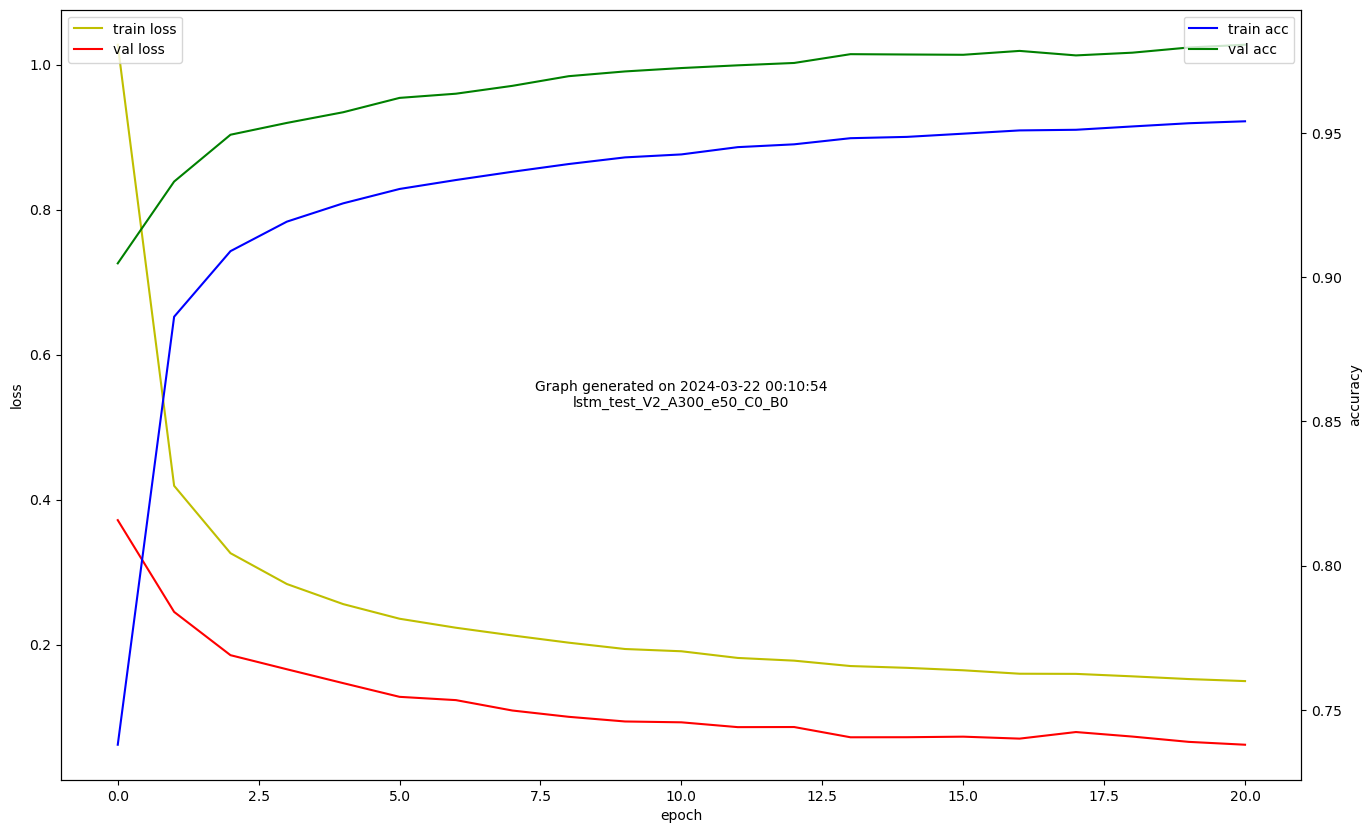

In [5]:
import matplotlib.pyplot as plt
from datetime import datetime
fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper right')


now = datetime.now()
current_time = now.strftime("%Y-%m-%d %H:%M:%S")
plt.text(0.5, 0.5, f"Graph generated on {current_time}\n{MODEL_NAME}", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
plt.savefig(f'{MODEL_NAME}.png')
plt.show()

In [7]:
1036073 / 400

2590.1825